In [73]:
import pandas as pd
import numpy as np

In [74]:
df=pd.read_csv('spam.csv')
df
# def spam(x):
#     if x=='spam':
#         return 1
#     else:
#         return 0
# df['spam']=df['Category'].apply(spam)
# df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [75]:
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [77]:
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [78]:
from sklearn.model_selection import train_test_split


In [79]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [80]:
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.25)

In [81]:
df.shape

(5572, 3)

In [82]:
x_test.shape

(1393,)

In [83]:
x_train.shape

(4179,)

In [84]:
type(x_train)

pandas.core.series.Series

In [85]:
x_train[:4]

1990    The basket's gettin full so I might be by tonight
800               Gimme a few was  &lt;#&gt;  minutes ago
560     Aiyo... U always c our ex one... I dunno abt m...
70         Wah lucky man... Then can save money... Hee...
Name: Message, dtype: object

In [86]:
df[:4]['Message']

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
Name: Message, dtype: object

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
x_train.values

array(["The basket's gettin full so I might be by tonight",
       'Gimme a few was  &lt;#&gt;  minutes ago',
       'Aiyo... U always c our ex one... I dunno abt mei, she haven reply... First time u reply so fast... Y so lucky not workin huh, got bao by ur sugardad ah...gee..',
       ...,
       "Well, i'm glad you didn't find it totally disagreeable ... Lol",
       'our mobile number has won £5000, to claim calls us back or ring the claims hot line on 09050005321.',
       'Your free ringtone is waiting to be collected. Simply text the password "MIX" to 85069 to verify. Get Usher and Britney. FML, PO Box 5249, MK17 92H. 450Ppw 16'],
      dtype=object)

In [89]:
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(x_train.values)
x.toarray()[:3]
x.shape
# for i in x:
#     print(i)
vectorizer.get_feature_names_out()[1000:1050]
vectorizer.get_feature_names_out().shape
vectorizer.vocabulary_
vectorizer.get_feature_names_out()[6001]

'shows'

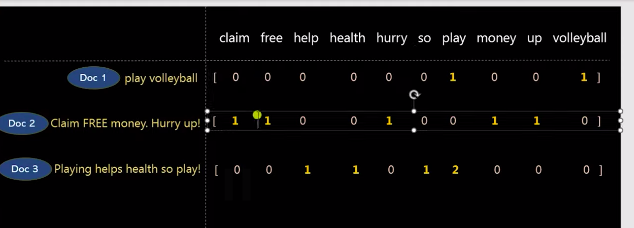

In [90]:
xxtrain=x.toarray()
xxtrain.shape

(4179, 7596)

In [91]:
xxtrain[:][0]

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
np.where(xxtrain[:][0]!=0)

(array([1212, 1244, 1567, 2982, 3063, 4386, 6145, 6678, 6830]),)

In [93]:
xxtrain[0]
x_train.values[0]


"The basket's gettin full so I might be by tonight"

In [94]:
vectorizer.get_feature_names_out()[np.where(xxtrain[0]!=0)]

array(['basket', 'be', 'by', 'full', 'gettin', 'might', 'so', 'the',
       'tonight'], dtype=object)

In [95]:
xxtrain[0][804]

0

In [96]:
from sklearn.naive_bayes import MultinomialNB

In [97]:
model=MultinomialNB()
model.fit(xxtrain,y_train)

MultinomialNB()

In [98]:
xxtest=vectorizer.transform(x_test.values).toarray()

In [99]:
y_pred=model.predict(xxtest)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1210
           1       0.96      0.91      0.93       183

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [106]:
#imbaalanced dataset
emails=[
    'Comfort Zone Is Your Biggest Enemy Nothing can prevent the growth of personality as your comfort zone. Paradoxically, life in a comfort zone leads to a hard life, life outside of a comfort zone creates an easy life. Life begins outs...',
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20/% discount on parking, exclusive offer just for you. Dont miss this reward!'
    ,
    'Exclusive offer for the employees of our company. Please look previous mail for further information, stay in touch!'
]


In [107]:
y=model.predict(vectorizer.transform(emails).toarray())
y

array([0, 0, 1, 0])

In [108]:
from sklearn.pipeline import Pipeline
clf= Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [112]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1210
           1       0.96      0.91      0.93       183

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393

